In [93]:
!#pip install xgboost

'#pip' is not recognized as an internal or external command,
operable program or batch file.


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor



In [95]:
df = pd.read_csv('C:\ML\WFH_burnout\work_from_home_burnout_dataset.csv')

In [96]:
df.head(4)

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,1,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,1,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,1,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low


In [97]:
df.shape

(1800, 11)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1800 non-null   int64  
 1   day_type              1800 non-null   object 
 2   work_hours            1800 non-null   float64
 3   screen_time_hours     1800 non-null   float64
 4   meetings_count        1800 non-null   int64  
 5   breaks_taken          1800 non-null   int64  
 6   after_hours_work      1800 non-null   int64  
 7   sleep_hours           1800 non-null   float64
 8   task_completion_rate  1800 non-null   float64
 9   burnout_score         1800 non-null   float64
 10  burnout_risk          1800 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 154.8+ KB


In [99]:
df.sample(5)

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
1583,159,Weekday,9.27,11.52,6,2,0,7.69,69.8,50.13,Low
163,17,Weekend,3.70,6.45,1,4,0,7.26,85.5,24.95,Low
344,35,Weekend,4.96,6.75,0,5,0,5.69,73.1,44.41,Low
800,81,Weekday,7.83,11.53,2,2,0,6.58,96.0,15.45,Low
1042,105,Weekend,5.85,7.55,0,2,0,6.18,99.0,17.58,Low


In [100]:
df.isnull().sum()

user_id                 0
day_type                0
work_hours              0
screen_time_hours       0
meetings_count          0
breaks_taken            0
after_hours_work        0
sleep_hours             0
task_completion_rate    0
burnout_score           0
burnout_risk            0
dtype: int64

In [101]:
# performing the onehot encoding using the pandas
df = pd.get_dummies(df, drop_first=True)
df.head(4)

,user_id,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,day_type_Weekend,burnout_risk_Low,burnout_risk_Medium
0,1,9.59,11.86,4,2,0,7.55,91.2,19.17,False,True,False
1,1,7.38,10.33,4,1,0,6.69,82.0,29.70,True,True,False
2,1,6.31,8.92,1,2,0,8.87,80.6,32.93,True,True,False
3,1,8.34,10.70,4,1,1,8.13,70.0,45.47,False,True,False


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1800 non-null   int64  
 1   work_hours            1800 non-null   float64
 2   screen_time_hours     1800 non-null   float64
 3   meetings_count        1800 non-null   int64  
 4   breaks_taken          1800 non-null   int64  
 5   after_hours_work      1800 non-null   int64  
 6   sleep_hours           1800 non-null   float64
 7   task_completion_rate  1800 non-null   float64
 8   burnout_score         1800 non-null   float64
 9   day_type_Weekend      1800 non-null   bool   
 10  burnout_risk_Low      1800 non-null   bool   
 11  burnout_risk_Medium   1800 non-null   bool   
dtypes: bool(3), float64(5), int64(4)
memory usage: 132.0 KB


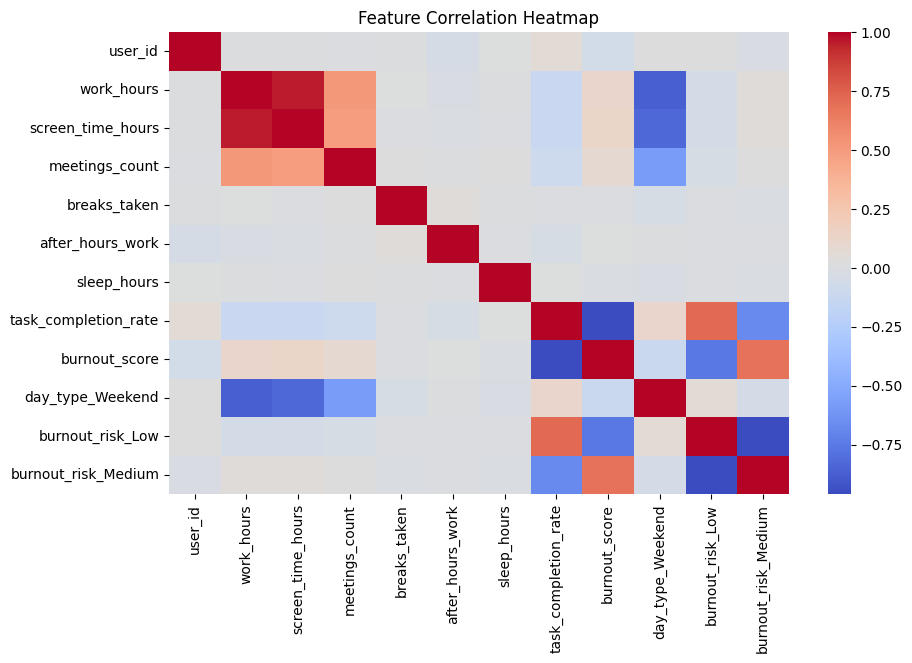

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [104]:
X = df.drop(
    ["user_id","burnout_score","burnout_risk_Low","burnout_risk_Medium"],
    axis=1
)

y = df["burnout_score"]

In [105]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [106]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

xgb_model.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [108]:
y_pred = xgb_model.predict(X_test)

In [109]:
print("R² Score :", r2_score(y_test, y_pred))
print("MAE      :", mean_absolute_error(y_test, y_pred))
print("RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score : 0.9320729876734936
MAE      : 4.835150176260206
RMSE     : 6.190339548999252


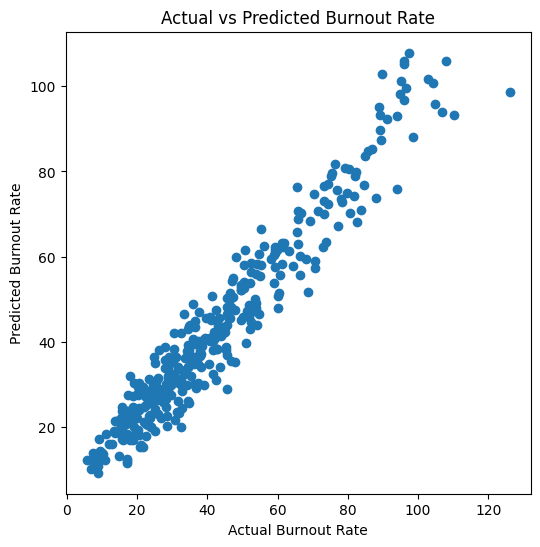

In [113]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Burnout Rate")
plt.ylabel("Predicted Burnout Rate")
plt.title("Actual vs Predicted Burnout Rate")
plt.show()


In [114]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    xgb_model, X, y, cv=5, scoring="r2"
)

print("CV R² Mean:", scores.mean())


CV R² Mean: 0.9199274218374296


In [115]:
import joblib

# Save trained model
joblib.dump(xgb_model, "burnout_linear_regression_model.pkl")

# Save fitted scaler
joblib.dump(scaler, "burnout_scaler.pkl")

print("Model and scaler saved successfully.")


Model and scaler saved successfully.
